# Cold Steel Scouting Report

The purpose of this report is to recommend which Cold Steel products Connective Systems & Supply should consider stocking.

## Table of Contents
* [Imports and Data Extraction](#Imports-and-Data-Extraction)
* [Determining Product Categories](#Determining-Product-Categories)
* [Determining which Properly Scoped Items to Stock](#Determining-which-Properly-Scoped-Items-to-Stock)
* [Understanding Profit Calculations](#Understanding-Profit-Calculations)
* [Remaining within Brand](#Remaining-within-Brand)
* [Final Determination of Items to Stock](#Final-Determination-of-Items-to-Stock)
    * [Branding](#Branding)
    * [Sales](#Sales)
* [Recommendations](#Recommendations)
* [Exports](#Exports)
* [Appendix](#Appendix)

## Imports and Data Extraction

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
source = pd.read_csv('../data/cold_steel.csv')

In [3]:
source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Seller SKU                              0 non-null      float64
 1   Title                                   553 non-null    object 
 2   ASIN                                    553 non-null    object 
 3   Alternative ASINs                       162 non-null    object 
 4   UPC                                     553 non-null    float64
 5   EAN                                     0 non-null      float64
 6   Brand                                   549 non-null    object 
 7   Product Group                           553 non-null    object 
 8   Parent ASIN                             125 non-null    object 
 9   Quantity                                0 non-null      float64
 10  Package Length                          541 non-null    float6

## Determining Product Categories
Since CSS is in the construction supply industry, it makes sense to determine which Cold Steel products fall into that category. If this assumption is wrong, the same analysis with respect to sales and profitibility [carried out below,](#Sales) could easily be applied to the entire Cold Steel catalogue.

If we stick to the assumption that CSS is interested in Cold Steel construction offerings, we can begin by looking at the listed product categories to determine whether any headings like "construction," "roofing," "hvac," "home improvement" etc. exist. [top](#Table-of-Contents)

In [4]:
source['Product Group'].unique()

array(['Sports', 'BISS Basic', 'Lawn & Patio', 'Kitchen', 'Home',
       'Home Improvement', 'Art and Craft Supply',
       'Automotive Parts and Accessories', 'Health and Beauty', 'Apparel'],
      dtype=object)

In [5]:
source[source['Product Group'] == 'Home Improvement']

,Seller SKU,Title,ASIN,Alternative ASINs,UPC,EAN,Brand,Product Group,Parent ASIN,Quantity,...,Cost,Referral Fee,FBA Fee,Total Fees,Total Costs,Est. Monthly Sales Share,Est. Monthly Profit Share,Est. Profit Margin,Est. Competitive Price,Est. Profit per Item
319,NaN,"""Cold Steel Pocket Shark Pen""",B00KN72ET0,"B001R0XNSI,B00BGFQ46W",7.054420e+11,NaN,Cold Steel,Home Improvement,NaN,NaN,...,2.95,2.25,3.19,5.44,8.39,0.00,0.00,44.0,14.98,6.59
367,NaN,"Cold Steel 97KMS Kukri Machete,Black",B000FJRR2K,NaN,7.054420e+11,NaN,Cold Steel,Home Improvement,NaN,NaN,...,19.95,4.30,8.51,12.81,32.76,163.20,-23.15,-14.0,28.69,-4.07
407,NaN,Cold Steel Spetsnaz Tactical Camp Shovel Tool ...,B00169V99K,B00D7A7QHU,7.054420e+11,NaN,Cold Steel,Home Improvement,B089ZNS2HW,NaN,...,12.95,3.00,8.51,11.51,24.46,4271.58,-960.41,-22.0,19.97,-4.49
501,NaN,"Perfect Balance Sheath Only, Cordura",B004WBLSYK,B0030D9RIA,7.054420e+11,NaN,Cold Steel,Home Improvement,NaN,NaN,...,5.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
542,NaN,Nitecore NPS600 55AH 594WH Lithium Ion Portabl...,B08F5K7ML7,B06XNZ24SL,7.054420e+11,NaN,Nitecore,Home Improvement,NaN,NaN,...,4.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The "Home Improvement" product category includes five items, so we will consider stocking them.

In [6]:
home_df = source[source['Product Group'] == 'Home Improvement']

Let's see what the 'Automotive Parts and Accessories' product category includes.

In [7]:
source[source['Product Group'] == 'Automotive Parts and Accessories']

,Seller SKU,Title,ASIN,Alternative ASINs,UPC,EAN,Brand,Product Group,Parent ASIN,Quantity,...,Cost,Referral Fee,FBA Fee,Total Fees,Total Costs,Est. Monthly Sales Share,Est. Monthly Profit Share,Est. Profit Margin,Est. Competitive Price,Est. Profit per Item
462,NaN,Cold Steel Pipe Hawk 90PHH,B00FRCC55E,B0030D9ROE,7.054420e+11,NaN,Cold Steel,Automotive Parts and Accessories,NaN,NaN,...,21.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Automotive returns one result, [the Pipe Hawk hatchet](https://www.coldsteel.com/pipe-hawk/), which Cold Steel describes as:
>Precision forged from 1055 carbon steel, Cold Steels Pipe Hawk offers a long, wide cutting edge and a solid, fully hardened hammer poll thats turned and ribbed to mimic a traditional hollow pipe bowl. Its fitted with a 22" hickory handle and is heavy enough to be effective as a chopping tool, plus, its solid bowl will drive nails, spikes and stakes with the power of a framing hammer.

Although there may be some construction utility for the item, there is no sales or margin information available from the report, so I would not recommend stocking the item in order to be conservative.

Drawing on the [knife offerings](https://www.milwaukeetool.com/Search#q=knife) from tool manufacturer [Milwaukee Tool](https://www.milwaukeetool.com/), we can get a sense of the types of knives most appropriate for construction purposes. Reviewing those offerings indicates that most of those knives include phrases like 'folding,' 'utility,' 'click,' 'snap,' 'fixed' and, of course, 'knife' in their names.

Accordingly, we'll select only those Cold Steel items with those terms in the item name.

In [8]:
scoped_df = source[source['Title'].str.contains('folding | utility | click | snap | fixed & knife', False)]

In [9]:
scoped_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 5 to 544
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Seller SKU                              0 non-null      float64
 1   Title                                   68 non-null     object 
 2   ASIN                                    68 non-null     object 
 3   Alternative ASINs                       2 non-null      object 
 4   UPC                                     68 non-null     float64
 5   EAN                                     0 non-null      float64
 6   Brand                                   68 non-null     object 
 7   Product Group                           68 non-null     object 
 8   Parent ASIN                             26 non-null     object 
 9   Quantity                                0 non-null      float64
 10  Package Length                          68 non-null     float64

In [10]:
scoped_df['Title'].unique()

array(['Cold Steel Espada Series Folding Knife with Tri-Ad Lock and Pocket Clip, Espada XL',
       'Cold Steel, G-10 Folding Knife, X-Large Espada, 7 1/2" stonewashed Blade, Ambidextrous Stainless Pocket/Belt Clip',
       'Cold Steel SR1 Series Tactical Folding Knife with Tri-Ad Lock and Pocket Clip, SR1 Tanto Lite',
       'Cold Steel Luzon Series Folding Knife with Pocket Clip, Large, Black/Silver',
       'Cold Steel 1911 Folding Knife with Liner Lock, Checkered Griv-Ex Handle, Ambidextrous Pocket Clip, and Flipper',
       'Cold Steel AD-10 and AD-15 Tactical Folding Knife with Lock and Pocket Clip - Premium S35VN Steel Blade, AD-10',
       'Cold Steel 4-Max Scout Folding Knife with Tri-Ad Lock and G-10 Handle, One Size',
       'Cold Steel Air Lite Folding Knife with Japanese 10A Steel Blade, Tri-Ad Lock, Pocket Clip and G-10 Handle, Drop Point',
       'Cold Steel Black Talon II Folding Knife with Tri-Ad Lock and Pocket Clip, Serrated, 4.0"',
       'Cold Steel Voyager Series 

This filtering results in 68 items to choose from, plus the five items from the 'Home Improvement' product category for a total of 73 possible items to stock.

In [11]:
full_scope = pd.concat([scoped_df, home_df])

In [12]:
full_scope.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 5 to 542
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Seller SKU                              0 non-null      float64
 1   Title                                   73 non-null     object 
 2   ASIN                                    73 non-null     object 
 3   Alternative ASINs                       6 non-null      object 
 4   UPC                                     73 non-null     float64
 5   EAN                                     0 non-null      float64
 6   Brand                                   73 non-null     object 
 7   Product Group                           73 non-null     object 
 8   Parent ASIN                             27 non-null     object 
 9   Quantity                                0 non-null      float64
 10  Package Length                          73 non-null     float64

## Determining which Properly Scoped Items to Stock
Since the goal of any supply business involves selling products and making profit on those sales, we can determine which items to stock according to which items have the best sales and which items have the most potential for profit.

To make those determinations, we begin by looking at the 'Sales Rank' column and ordering it from lowest to highest. [top](#Table-of-Contents)

In [13]:
full_scope.sort_values(by=['Sales Rank'], inplace=True)

In [14]:
full_scope.head()

,Seller SKU,Title,ASIN,Alternative ASINs,UPC,EAN,Brand,Product Group,Parent ASIN,Quantity,...,Cost,Referral Fee,FBA Fee,Total Fees,Total Costs,Est. Monthly Sales Share,Est. Monthly Profit Share,Est. Profit Margin,Est. Competitive Price,Est. Profit per Item
407,NaN,Cold Steel Spetsnaz Tactical Camp Shovel Tool ...,B00169V99K,B00D7A7QHU,7.054420e+11,NaN,Cold Steel,Home Improvement,B089ZNS2HW,NaN,...,12.95,3.00,8.51,11.51,24.46,4271.58,-960.41,-22.0,19.97,-4.49
22,NaN,Cold Steel AD-10 and AD-15 Tactical Folding Kn...,B07MZW57XN,NaN,7.054420e+11,NaN,Cold Steel,Sports,B08C2X2SHK,NaN,...,99.95,19.26,3.19,22.45,122.40,2156.95,100.63,5.0,128.39,5.99
399,NaN,Cold Steel AD-10 and AD-15 Tactical Folding Kn...,B07MZWWYPC,NaN,7.054420e+11,NaN,Cold Steel,Sports,B08C2X2SHK,NaN,...,129.95,20.31,3.19,23.50,153.45,1516.14,-202.50,-13.0,135.37,-18.08
161,NaN,Cold Steel Voyager Series Folding Knife with T...,B07CL4BSQ3,NaN,7.054420e+11,NaN,Cold Steel,Sports,B088Z96S93,NaN,...,49.95,9.48,3.19,12.67,62.62,237.90,2.26,1.0,63.22,0.60
353,NaN,Cold Steel Voyager Series Folding Knife with T...,B07MZSTRV6,NaN,7.054420e+11,NaN,Cold Steel,Sports,B088Z96S93,NaN,...,59.95,10.89,3.19,14.08,74.03,392.09,-7.67,-2.0,72.61,-1.42


We're having trouble seeing all the relevant data on the screen at the same time, so we'll truncate the dataframe to only the relevant columns

In [15]:
cols = ['Title',
        'ASIN',
        'Brand',
        'Product Group',
        'Sales Rank',
        'Est. Monthly Sales Share',
        'Est. Monthly Profit Share',
        'Est. Profit Margin',
        'Est. Profit per Item']

In [16]:
full_scope[cols]

,Title,ASIN,Brand,Product Group,Sales Rank,Est. Monthly Sales Share,Est. Monthly Profit Share,Est. Profit Margin,Est. Profit per Item
407,Cold Steel Spetsnaz Tactical Camp Shovel Tool ...,B00169V99K,Cold Steel,Home Improvement,3956.0,4271.58,-960.41,-22.0,-4.49
22,Cold Steel AD-10 and AD-15 Tactical Folding Kn...,B07MZW57XN,Cold Steel,Sports,22622.0,2156.95,100.63,5.0,5.99
399,Cold Steel AD-10 and AD-15 Tactical Folding Kn...,B07MZWWYPC,Cold Steel,Sports,22622.0,1516.14,-202.50,-13.0,-18.08
161,Cold Steel Voyager Series Folding Knife with T...,B07CL4BSQ3,Cold Steel,Sports,24034.0,237.90,2.26,1.0,0.60
353,Cold Steel Voyager Series Folding Knife with T...,B07MZSTRV6,Cold Steel,Sports,24034.0,392.09,-7.67,-2.0,-1.42
...,...,...,...,...,...,...,...,...,...
279,Cold Steel Click N Cut (3 Pack of Bowie Blades...,B09DLF4FSZ,Cold Steel,Sports,1001943.0,0.00,0.00,13.0,2.92
484,Cold Steel Click N Cut (3 Pack of Clip pt Blad...,B09DLJM31M,Cold Steel,Sports,NaN,NaN,NaN,13.0,2.92
512,Cold Steel Folding Click n Cut 3 Pack of Serra...,B09DLC91NK,Cold Steel,Sports,NaN,NaN,NaN,7.0,1.33
501,"Perfect Balance Sheath Only, Cordura",B004WBLSYK,Cold Steel,Home Improvement,NaN,NaN,NaN,NaN,NaN


In [17]:
trunc = full_scope[cols]

The top 20 best selling Cold Steel items include many items estimated to lose money on each sale.

In [18]:
trunc.head(20)

,Title,ASIN,Brand,Product Group,Sales Rank,Est. Monthly Sales Share,Est. Monthly Profit Share,Est. Profit Margin,Est. Profit per Item
407,Cold Steel Spetsnaz Tactical Camp Shovel Tool ...,B00169V99K,Cold Steel,Home Improvement,3956.0,4271.58,-960.41,-22.0,-4.49
22,Cold Steel AD-10 and AD-15 Tactical Folding Kn...,B07MZW57XN,Cold Steel,Sports,22622.0,2156.95,100.63,5.0,5.99
399,Cold Steel AD-10 and AD-15 Tactical Folding Kn...,B07MZWWYPC,Cold Steel,Sports,22622.0,1516.14,-202.50,-13.0,-18.08
161,Cold Steel Voyager Series Folding Knife with T...,B07CL4BSQ3,Cold Steel,Sports,24034.0,237.90,2.26,1.0,0.60
353,Cold Steel Voyager Series Folding Knife with T...,B07MZSTRV6,Cold Steel,Sports,24034.0,392.09,-7.67,-2.0,-1.42
365,Cold Steel Voyager Series Folding Knife with T...,B07MZXGN8T,Cold Steel,Sports,24034.0,375.95,-21.38,-6.0,-3.96
382,Cold Steel Voyager Series Folding Knife with T...,B07CL33TVS,Cold Steel,Sports,24034.0,552.51,-66.51,-12.0,-6.22
56,Cold Steel Voyager Series Folding Knife with T...,B07MZXCFPZ,Cold Steel,Sports,24034.0,830.00,30.37,4.0,2.84
73,Cold Steel Voyager Series Folding Knife with T...,B0851PNHB5,Cold Steel,Sports,24034.0,310.10,22.26,7.0,6.10
346,Cold Steel Voyager Series Folding Knife with T...,B07CMGDMLT,Cold Steel,Sports,24034.0,265.07,-5.78,-2.0,-1.28


In [19]:
objects = list(trunc.head(20)['Title'].values)
y_pos = np.arange(len(objects))
performance = list(trunc.head(20)['Est. Profit Margin'].values)
xlabel = 'Product Sales Ranking'
ylabel = 'Profit Margin'
title = 'Profit Margin for Bestselling Items'
path = '../images/bestsellerProfits.png'

In [20]:
def make_bars(objects, y_pos, performance, xlabel, ylabel, title, path):
    
    mean_perf = sum(performance) / len(performance)
    
    plt.figure(figsize=(16, 8))
    
    plt.axhline(y=mean_perf,linewidth=1, label= f'average margin = {round(mean_perf, 2)}%', color='r')
    plt.bar(y_pos, performance, align='center', alpha=0.5)
    
    plt.xticks(y_pos, [x for x in range(1, len(objects)+1)])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    
    plt.savefig(path)
    plt.show()

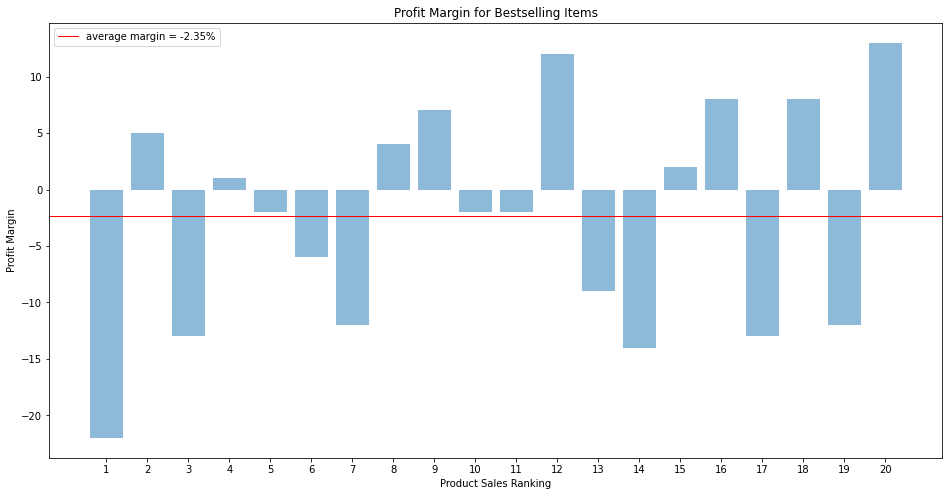

In [21]:
make_bars(objects, y_pos, performance, xlabel, ylabel, title, path)

As we can see, stocking the bestselling 20 items would result in a loss margin of 2.35 percent.

Indeed, we can take the scouting report's estimates of monthly profit to illustrate how stocking each item among the 20 bestselling items would impact profits on a monthly basis.

In [22]:
objects = list(trunc.head(20)['Title'].values)
y_pos = np.arange(len(objects))
performance = list(trunc.head(20)['Est. Monthly Profit Share'].cumsum())
xlabel = 'Product Sales Ranking'
ylabel = 'Est. Monthly Profit Total (USD)'
title = 'Monthly Losses for Bestselling Items'
path = '../images/bestsellerProfitPlot.png'

In [23]:
def makePlot(objects, y_pos, performance, xlabel, ylabel, title, path):
    plt.figure(figsize=(16, 8))

    plt.plot(np.arange(len(objects)), performance)

    plt.xticks(y_pos, [x for x in range(1, len(objects)+1)])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    for var in (np.arange(len(objects)), performance):
        plt.annotate('%0.2f' % performance[-1], xy=(1, performance[-1]), xytext=(8, 0), 
                     xycoords=('axes fraction', 'data'), textcoords='offset points')

    plt.savefig(path)
    plt.show()

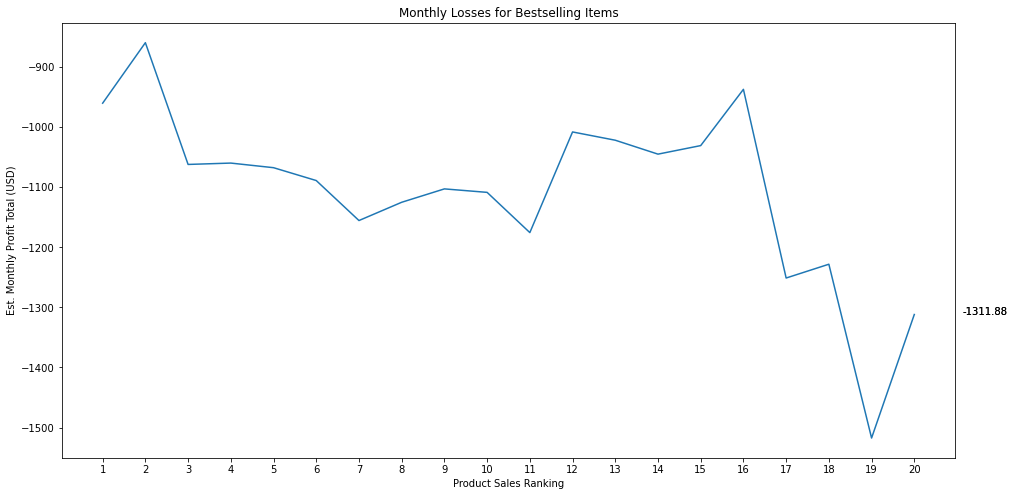

In [24]:
makePlot(objects, y_pos, performance, xlabel, ylabel, title, path)

The chart indicates that stocking each of the top 20 bestselling items would result in a net loss of approximately $1300 each month.

Accordingly, it would make sense to limit the items to stock to those bestselling items estimated to actually make a profit.

In [25]:
top20 = trunc.head(20)
top20[top20['Est. Profit Margin']>0]

,Title,ASIN,Brand,Product Group,Sales Rank,Est. Monthly Sales Share,Est. Monthly Profit Share,Est. Profit Margin,Est. Profit per Item
22,Cold Steel AD-10 and AD-15 Tactical Folding Kn...,B07MZW57XN,Cold Steel,Sports,22622.0,2156.95,100.63,5.0,5.99
161,Cold Steel Voyager Series Folding Knife with T...,B07CL4BSQ3,Cold Steel,Sports,24034.0,237.90,2.26,1.0,0.60
56,Cold Steel Voyager Series Folding Knife with T...,B07MZXCFPZ,Cold Steel,Sports,24034.0,830.00,30.37,4.0,2.84
73,Cold Steel Voyager Series Folding Knife with T...,B0851PNHB5,Cold Steel,Sports,24034.0,310.10,22.26,7.0,6.10
14,Cold Steel Luzon Series Folding Knife with Poc...,B07BK7TZ5B,Cold Steel,Sports,36836.0,1433.36,167.40,12.0,4.96
92,Cold Steel Finn Wolf Folding Pocket Knife - 20NPF,B00U1I875Q,Cold Steel,Sports,41257.0,633.16,14.21,2.0,0.79
24,Cold Steel 4-Max Scout Folding Knife with Tri-...,B0851QHMJZ,Cold Steel,Sports,41443.0,1192.38,93.55,8.0,6.42
70,Cold Steel SR1 Series Tactical Folding Knife w...,B084PV329G,Cold Steel,Sports,48400.0,280.95,22.94,8.0,3.31
10,Cold Steel SR1 Series Tactical Folding Knife w...,B084PTKRWP,Cold Steel,Sports,52451.0,1523.90,205.45,13.0,5.87


In [26]:
objects = list(top20[top20['Est. Profit Margin']>0]['Title'].values)
y_pos = np.arange(len(objects))
performance = list(top20[top20['Est. Profit Margin']>0]['Est. Profit Margin'].values)
xlabel = 'Product Sales Ranking'
ylabel = 'Profit Margin'
title = 'Margins for Profitable Bestselling Items'
path = '../images/profitableMargins.png'

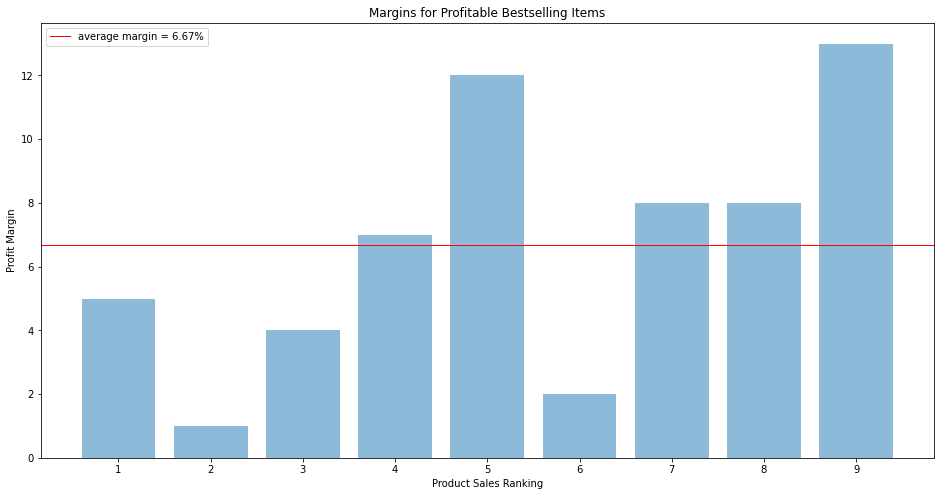

In [27]:
make_bars(objects, y_pos, performance, xlabel, ylabel, title, path)

By limiting inventory to bestselling items that turn a profit, we move a marginal loss of 2.35% to a marginal gain of 6.67%. Applied to estimated monthly profit, that swing goes from a loss of 1300 (USD) to a profit of 700 (USD).

In [28]:
objects = list(top20[top20['Est. Profit Margin']>0]['Title'].values)
y_pos = np.arange(len(objects))
performance = list(top20[top20['Est. Profit Margin']>0]['Est. Monthly Profit Share'].cumsum())
xlabel = 'Product Sales Ranking'
ylabel = 'Est. Monthly Profit Total (USD)'
title = 'Monthly Earnings for Profitable Bestselling Items'
path = '../images/profitableEarningsPlot.png'

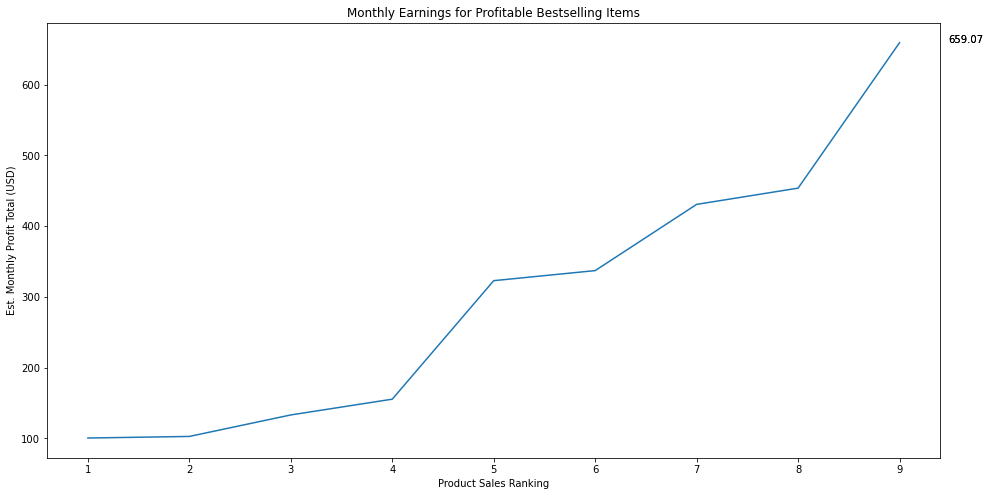

In [29]:
makePlot(objects, y_pos, performance, xlabel, ylabel, title, path)

## Understanding Profit Calculations

Before we go too far determining whether we should just choose to stock the profitable items from the top 20 sellers, we should do a little investigation to make sure we understand how those profit columns, 'Est. Profit Margin' and 'Est. Profit per Item' are calculated.

We'll start that process by looking at just the columns dealing with cost and profit. [top](#Table-of-Contents)

In [30]:
cost_trunc = full_scope[['Title',
                         'ASIN',
                         'Brand',
                         'Product Group',
                         'Sales Rank',
                         'MSRP (List Price)',
                         'Lowest FBA price',
                         'Lowest FBM price',
                         'BuyBox price',
                         'Cost',
                         'Referral Fee',
                         'FBA Fee',
                         'Total Fees',
                         'Total Costs',
                         'Est. Monthly Sales Share',
                         'Est. Monthly Profit Share',
                         'Est. Profit Margin',
                         'Est. Competitive Price',
                         'Est. Profit per Item']]

In [31]:
cost_trunc.head(1)

,Title,ASIN,Brand,Product Group,Sales Rank,MSRP (List Price),Lowest FBA price,Lowest FBM price,BuyBox price,Cost,Referral Fee,FBA Fee,Total Fees,Total Costs,Est. Monthly Sales Share,Est. Monthly Profit Share,Est. Profit Margin,Est. Competitive Price,Est. Profit per Item
407,Cold Steel Spetsnaz Tactical Camp Shovel Tool ...,B00169V99K,Cold Steel,Home Improvement,3956.0,31.99,19.97,25.21,19.97,12.95,3.0,8.51,11.51,24.46,4271.58,-960.41,-22.0,19.97,-4.49


Looking at just the first row of the truncated dataset, it appears that the profit per item price is simply the difference between the estimated competitive price and total costs.

In [32]:
cost_trunc.head(1)

,Title,ASIN,Brand,Product Group,Sales Rank,MSRP (List Price),Lowest FBA price,Lowest FBM price,BuyBox price,Cost,Referral Fee,FBA Fee,Total Fees,Total Costs,Est. Monthly Sales Share,Est. Monthly Profit Share,Est. Profit Margin,Est. Competitive Price,Est. Profit per Item
407,Cold Steel Spetsnaz Tactical Camp Shovel Tool ...,B00169V99K,Cold Steel,Home Improvement,3956.0,31.99,19.97,25.21,19.97,12.95,3.0,8.51,11.51,24.46,4271.58,-960.41,-22.0,19.97,-4.49


In [33]:
cost_trunc.head(1)['Est. Competitive Price'] - cost_trunc.head(1)['Total Costs']

407   -4.49
dtype: float64

In turn, total costs is simply the sum of the respective fees and the wholesale price:

In [34]:
sum(cost_trunc.head(1)['Cost'],
    cost_trunc.head(1)['Total Fees'])

407    24.46
Name: Total Fees, dtype: float64

Finally, profit margin represents the percentage of profit per sale at the competitive price (rounded to the nearest integer).

In [35]:
round((cost_trunc.head(1)['Est. Profit per Item'] / cost_trunc.head(1)['Est. Competitive Price']) * 100)

407   -22.0
dtype: float64

Now that we've confirmed the calculations for the profit columns we're using for our recommendations, I see no reason to divert from the previous strategy of stocking the best selling items that are also profitable.

## Remaining within Brand
I recall from my days in construction that I rarely carried anything but a utility knife while on the job. In fact, my employer explicitly banned non-utility, folding and fixed knives due to safety considerations.

When reviewing our list of top 20 best selling items that are also profitable, I don't see any utility knife or blade options. Based purely on my experience in construction, I would recommend carrying a few of these products with the same considerations of net profitability we used to winnow the field previously. [top](#Table-of-Contents)

In [36]:
trunc[trunc['Title'].str.contains('utility | click | replacement | snap & knife', False)]

,Title,ASIN,Brand,Product Group,Sales Rank,Est. Monthly Sales Share,Est. Monthly Profit Share,Est. Profit Margin,Est. Profit per Item
162,"Cold Steel Utility Knife (Kitchen Classics), B...",B019RSXHEQ,Cold Steel,Sports,131313.0,24.64,2.23,9.0,1.45
337,Cold Steel Click-N-Cut Exchangeable Blade Util...,B0851PYCVP,Cold Steel,Sports,250913.0,20.09,-2.01,-10.0,-1.41
189,"Cold Steel Click N Cut Hunter / 6 1/2"" Overall...",B09DLFYFCM,Cold Steel,Sports,301467.0,5.63,1.07,19.0,4.66
203,Cold Steel 40A Click N Cut Folder 2.5 in Blade...,B084PTXKXV,Cold Steel,Sports,318397.0,6.41,0.71,11.0,2.73
220,Cold Steel Slock Master Skinner Click N Cut / ...,B09DLG1SW9,Cold Steel,Sports,377177.0,2.51,0.30,12.0,3.07
327,Cold Steel Click-N-Cut Exchangeable Blade Util...,B0851PYJD1,Cold Steel,Sports,522287.0,1.45,-0.26,-18.0,-2.32
301,Cold Steel 40AP3C Click N Cut Replacement Blad...,B0851Q2VHL,Cold Steel,Sports,534761.0,0.00,0.00,-8.0,-1.14
283,Cold Steel Click N Cut (3 Pack of Gut Hook Bla...,B09DLJKKHW,Cold Steel,Sports,744387.0,0.00,0.00,13.0,2.92
287,Cold Steel Click N Cut (3 Pack of Caping Blade...,B09DLJBBDR,Cold Steel,Sports,883929.0,0.00,0.00,13.0,2.92
279,Cold Steel Click N Cut (3 Pack of Bowie Blades...,B09DLF4FSZ,Cold Steel,Sports,1001943.0,0.00,0.00,13.0,2.92


In [37]:
utility = trunc[trunc['Title'].str.contains('utility | click | snap & knife', False)]

In [38]:
utility[utility['Est. Profit Margin']>0]

,Title,ASIN,Brand,Product Group,Sales Rank,Est. Monthly Sales Share,Est. Monthly Profit Share,Est. Profit Margin,Est. Profit per Item
162,"Cold Steel Utility Knife (Kitchen Classics), B...",B019RSXHEQ,Cold Steel,Sports,131313.0,24.64,2.23,9.0,1.45
189,"Cold Steel Click N Cut Hunter / 6 1/2"" Overall...",B09DLFYFCM,Cold Steel,Sports,301467.0,5.63,1.07,19.0,4.66
203,Cold Steel 40A Click N Cut Folder 2.5 in Blade...,B084PTXKXV,Cold Steel,Sports,318397.0,6.41,0.71,11.0,2.73
220,Cold Steel Slock Master Skinner Click N Cut / ...,B09DLG1SW9,Cold Steel,Sports,377177.0,2.51,0.30,12.0,3.07
283,Cold Steel Click N Cut (3 Pack of Gut Hook Bla...,B09DLJKKHW,Cold Steel,Sports,744387.0,0.00,0.00,13.0,2.92
287,Cold Steel Click N Cut (3 Pack of Caping Blade...,B09DLJBBDR,Cold Steel,Sports,883929.0,0.00,0.00,13.0,2.92
279,Cold Steel Click N Cut (3 Pack of Bowie Blades...,B09DLF4FSZ,Cold Steel,Sports,1001943.0,0.00,0.00,13.0,2.92
484,Cold Steel Click N Cut (3 Pack of Clip pt Blad...,B09DLJM31M,Cold Steel,Sports,NaN,NaN,NaN,13.0,2.92
512,Cold Steel Folding Click n Cut 3 Pack of Serra...,B09DLC91NK,Cold Steel,Sports,NaN,NaN,NaN,7.0,1.33


Because these items have much lower sales than the best selling items from Cold Steel, it may only be worth carrying a few of these items, for example, the 40A Click N Cut Folder and replacement blades.

In [39]:
utility_prof = utility[utility['Est. Profit Margin']>0]
util_recs = utility[utility['Title'].str.contains('40A Click N Cut Folder | Serrated', False)]

## Final Determination of Items to Stock

We've allowed two principles to guide the decision about which Cold Steel items to stock so far: Branding and Sales. Our final recommendations will advance two conservative estimates of which items to stock by combining these strategies to greater or lesser degrees. [top](#Table-of-Contents)

### Branding
Given that Connective Systems & Supply brands itself as a supplier to the construction industry, I began this analysis by limiting the field of potential products to those items with a plausible construction industry application. I made that determination by selecting appropriate product categories and using keywords sourced from a major tool manufacturer's selection of edged products. Additionally, I drew on my professional experience to round out the group of brand-specific items for consideration.

In [40]:
home_df[['Title',
         'ASIN',
         'Brand',
         'Product Group',
         'Sales Rank',
         'Est. Monthly Sales Share',
         'Est. Monthly Profit Share',
         'Est. Profit Margin',
         'Est. Profit per Item']]

,Title,ASIN,Brand,Product Group,Sales Rank,Est. Monthly Sales Share,Est. Monthly Profit Share,Est. Profit Margin,Est. Profit per Item
319,"""Cold Steel Pocket Shark Pen""",B00KN72ET0,Cold Steel,Home Improvement,547231.0,0.00,0.00,44.0,6.59
367,"Cold Steel 97KMS Kukri Machete,Black",B000FJRR2K,Cold Steel,Home Improvement,40802.0,163.20,-23.15,-14.0,-4.07
407,Cold Steel Spetsnaz Tactical Camp Shovel Tool ...,B00169V99K,Cold Steel,Home Improvement,3956.0,4271.58,-960.41,-22.0,-4.49
501,"Perfect Balance Sheath Only, Cordura",B004WBLSYK,Cold Steel,Home Improvement,NaN,NaN,NaN,NaN,NaN
542,Nitecore NPS600 55AH 594WH Lithium Ion Portabl...,B08F5K7ML7,Nitecore,Home Improvement,NaN,NaN,NaN,NaN,NaN


In [41]:
home_recs = home_df[['Title',
                     'ASIN',
                     'Brand',
                     'Product Group',
                     'Sales Rank',
                     'Est. Monthly Sales Share',
                     'Est. Monthly Profit Share',
                     'Est. Profit Margin',
                     'Est. Profit per Item']]

In [42]:
util_recs

,Title,ASIN,Brand,Product Group,Sales Rank,Est. Monthly Sales Share,Est. Monthly Profit Share,Est. Profit Margin,Est. Profit per Item
203,Cold Steel 40A Click N Cut Folder 2.5 in Blade...,B084PTXKXV,Cold Steel,Sports,318397.0,6.41,0.71,11.0,2.73
512,Cold Steel Folding Click n Cut 3 Pack of Serra...,B09DLC91NK,Cold Steel,Sports,NaN,NaN,NaN,7.0,1.33


In [43]:
brand_recs = pd.concat([home_recs, util_recs])
brand_recs.sort_values(by=['Sales Rank'], inplace=True)
brand_recs

,Title,ASIN,Brand,Product Group,Sales Rank,Est. Monthly Sales Share,Est. Monthly Profit Share,Est. Profit Margin,Est. Profit per Item
407,Cold Steel Spetsnaz Tactical Camp Shovel Tool ...,B00169V99K,Cold Steel,Home Improvement,3956.0,4271.58,-960.41,-22.0,-4.49
367,"Cold Steel 97KMS Kukri Machete,Black",B000FJRR2K,Cold Steel,Home Improvement,40802.0,163.20,-23.15,-14.0,-4.07
203,Cold Steel 40A Click N Cut Folder 2.5 in Blade...,B084PTXKXV,Cold Steel,Sports,318397.0,6.41,0.71,11.0,2.73
319,"""Cold Steel Pocket Shark Pen""",B00KN72ET0,Cold Steel,Home Improvement,547231.0,0.00,0.00,44.0,6.59
501,"Perfect Balance Sheath Only, Cordura",B004WBLSYK,Cold Steel,Home Improvement,NaN,NaN,NaN,NaN,NaN
542,Nitecore NPS600 55AH 594WH Lithium Ion Portabl...,B08F5K7ML7,Nitecore,Home Improvement,NaN,NaN,NaN,NaN,NaN
512,Cold Steel Folding Click n Cut 3 Pack of Serra...,B09DLC91NK,Cold Steel,Sports,NaN,NaN,NaN,7.0,1.33


Recommendations due to branding considerations alone number seven possible items, but we can see that some items have negative profits associated with them while others have no sales or profit information, so it is likely this list will be shortened when we apply sales considerations to the selection process.

### Sales
Assuming the objective to stock new items involves making a profit, it is imperative not only to stock brand appropriate items, but brand appropriate items that will sell for a profit as well. Accordingly, I sorted the entire group of brand appropriate items by their sales rankings and then limited the view first to the top 20 bestselling items and then to the profitable items among that group. [top](#Table-of-Contents)

In [44]:
profit_20 = top20[top20['Est. Profit Margin']>0]
profit_20

,Title,ASIN,Brand,Product Group,Sales Rank,Est. Monthly Sales Share,Est. Monthly Profit Share,Est. Profit Margin,Est. Profit per Item
22,Cold Steel AD-10 and AD-15 Tactical Folding Kn...,B07MZW57XN,Cold Steel,Sports,22622.0,2156.95,100.63,5.0,5.99
161,Cold Steel Voyager Series Folding Knife with T...,B07CL4BSQ3,Cold Steel,Sports,24034.0,237.90,2.26,1.0,0.60
56,Cold Steel Voyager Series Folding Knife with T...,B07MZXCFPZ,Cold Steel,Sports,24034.0,830.00,30.37,4.0,2.84
73,Cold Steel Voyager Series Folding Knife with T...,B0851PNHB5,Cold Steel,Sports,24034.0,310.10,22.26,7.0,6.10
14,Cold Steel Luzon Series Folding Knife with Poc...,B07BK7TZ5B,Cold Steel,Sports,36836.0,1433.36,167.40,12.0,4.96
92,Cold Steel Finn Wolf Folding Pocket Knife - 20NPF,B00U1I875Q,Cold Steel,Sports,41257.0,633.16,14.21,2.0,0.79
24,Cold Steel 4-Max Scout Folding Knife with Tri-...,B0851QHMJZ,Cold Steel,Sports,41443.0,1192.38,93.55,8.0,6.42
70,Cold Steel SR1 Series Tactical Folding Knife w...,B084PV329G,Cold Steel,Sports,48400.0,280.95,22.94,8.0,3.31
10,Cold Steel SR1 Series Tactical Folding Knife w...,B084PTKRWP,Cold Steel,Sports,52451.0,1523.90,205.45,13.0,5.87


Limiting the view to only the top 20 bestselling items within the construction brand may be unwarranted if CSS wants to pursue a less conservative route. We could easily include all the profitable items among our recommendations.

In [45]:
trunc[trunc['Est. Profit Margin']>0]

,Title,ASIN,Brand,Product Group,Sales Rank,Est. Monthly Sales Share,Est. Monthly Profit Share,Est. Profit Margin,Est. Profit per Item
22,Cold Steel AD-10 and AD-15 Tactical Folding Kn...,B07MZW57XN,Cold Steel,Sports,22622.0,2156.95,100.63,5.0,5.99
161,Cold Steel Voyager Series Folding Knife with T...,B07CL4BSQ3,Cold Steel,Sports,24034.0,237.90,2.26,1.0,0.60
56,Cold Steel Voyager Series Folding Knife with T...,B07MZXCFPZ,Cold Steel,Sports,24034.0,830.00,30.37,4.0,2.84
73,Cold Steel Voyager Series Folding Knife with T...,B0851PNHB5,Cold Steel,Sports,24034.0,310.10,22.26,7.0,6.10
14,Cold Steel Luzon Series Folding Knife with Poc...,B07BK7TZ5B,Cold Steel,Sports,36836.0,1433.36,167.40,12.0,4.96
92,Cold Steel Finn Wolf Folding Pocket Knife - 20NPF,B00U1I875Q,Cold Steel,Sports,41257.0,633.16,14.21,2.0,0.79
24,Cold Steel 4-Max Scout Folding Knife with Tri-...,B0851QHMJZ,Cold Steel,Sports,41443.0,1192.38,93.55,8.0,6.42
70,Cold Steel SR1 Series Tactical Folding Knife w...,B084PV329G,Cold Steel,Sports,48400.0,280.95,22.94,8.0,3.31
10,Cold Steel SR1 Series Tactical Folding Knife w...,B084PTKRWP,Cold Steel,Sports,52451.0,1523.90,205.45,13.0,5.87
5,Cold Steel Espada Series Folding Knife with Tr...,B07MZXD1NW,Cold Steel,Sports,81041.0,3134.93,384.95,12.0,44.69


In [46]:
len(trunc[trunc['Est. Profit Margin']>0])

45

In [47]:
len(profit_20)

9

If space were no object, we could maximize profit margins by finding the number of profitable item categories needed to achieve the highest average margin.

In [48]:
objects = list(trunc[trunc['Est. Profit Margin']>0].values)
y_pos = np.arange(len(objects))
performance = list(trunc[trunc['Est. Profit Margin']>0]['Est. Profit Margin'].expanding(1).mean())
xlabel = 'Product Sales Ranking'
ylabel = 'Average Margin (%)'
title = 'Average Margin for Profitable Items Ranked by Sales'
path = '../images/averageMarginPlotScoped.png'

In [49]:
def findNofCategories(objects, y_pos, performance, xlabel, ylabel, title, path):
    
    ymax = max(performance)
    xpos = performance.index(ymax)
    xmax = np.arange(len(objects))[xpos]
    
    plt.figure(figsize=(16, 8))

    plt.plot(np.arange(len(objects)), performance)

    plt.xticks(y_pos, [x for x in range(1, len(objects)+1)])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    for var in (np.arange(len(objects)), performance):
        plt.annotate(f'{round(ymax, 2)}%, stocking {xmax + 1} items', xy=(xmax, ymax), xytext=(xmax, ymax + .1))

    plt.savefig(path)
    plt.show()

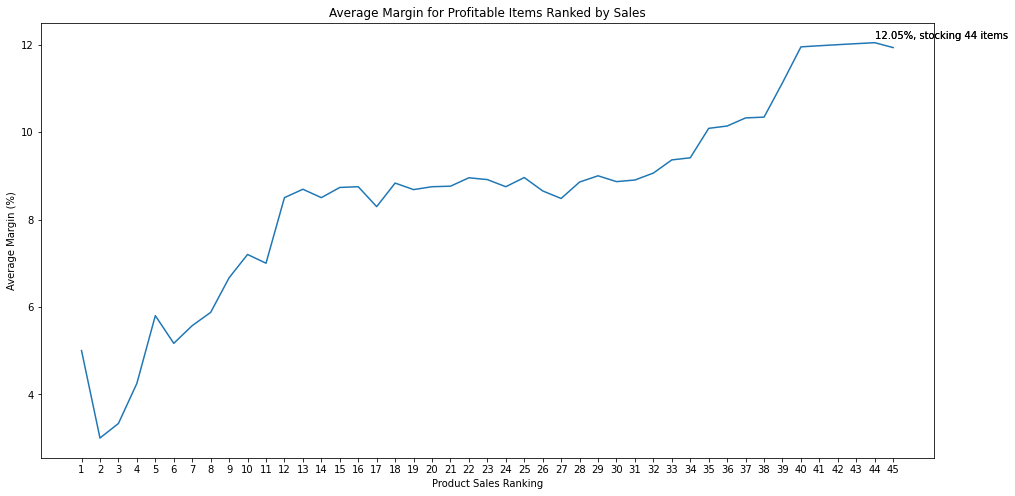

In [50]:
findNofCategories(objects, y_pos, performance, xlabel, ylabel, title, path)

As it turns out, it makes sense to carry nearly all the profitable properly scoped items from Cold Steel since carrying 44 of 45 items reaches the highest average margin of about 12 percent.

We can also confirm our earlier conclusion that carrying all 9 of the profitable top 20 bestselling items reaches the maximum average margin for that group at nearly 7 percent.

In [51]:
objects = list(profit_20.values)
y_pos = np.arange(len(objects))
performance = list(profit_20['Est. Profit Margin'].expanding(1).mean())
xlabel = 'Product Sales Ranking'
ylabel = 'Average Margin (%)'
title = 'Average Margin for Profitable Bestselling Ranked by Sales'
path = '../images/averageMarginBestsellersPlotScoped.png'

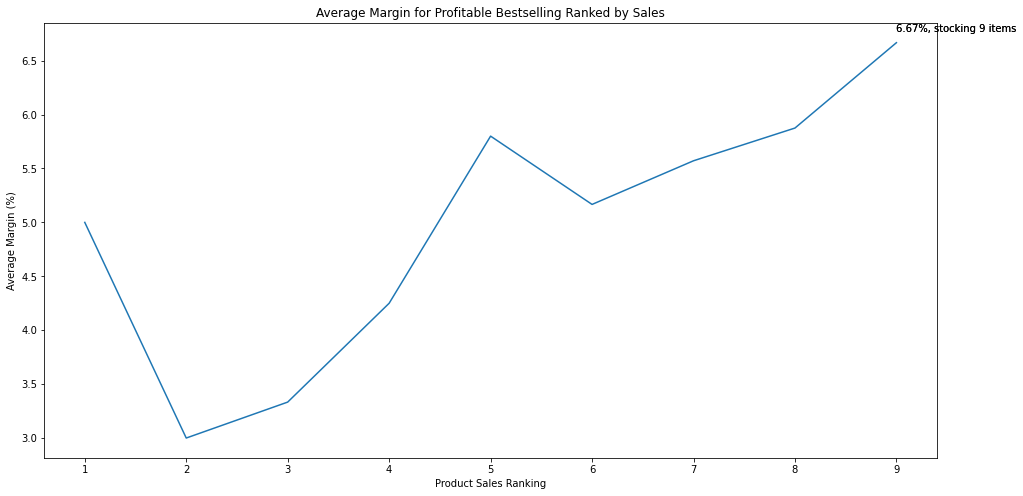

In [52]:
findNofCategories(objects, y_pos, performance, xlabel, ylabel, title, path)

Assuming the more conservative approach leaves us with 9 items that represent a good chance of selling profitably as opposed to 45 items presumed to be profitable, but might also produce fewer sales.

## Recommendations

**The most conservative recommendation would be to stock only these 9 profitable, bestselling, in-brand items.** [top](#Table-of-Contents)

Ultimately, the number of items to stock is a business decsion depending on strategic considerations. This analysis could be used to identify the number of item categories to carry in order to achieve a particular profit margin or monthly profit depending on the accuracy of the scouting report's estimates.

In [53]:
profit_20

,Title,ASIN,Brand,Product Group,Sales Rank,Est. Monthly Sales Share,Est. Monthly Profit Share,Est. Profit Margin,Est. Profit per Item
22,Cold Steel AD-10 and AD-15 Tactical Folding Kn...,B07MZW57XN,Cold Steel,Sports,22622.0,2156.95,100.63,5.0,5.99
161,Cold Steel Voyager Series Folding Knife with T...,B07CL4BSQ3,Cold Steel,Sports,24034.0,237.90,2.26,1.0,0.60
56,Cold Steel Voyager Series Folding Knife with T...,B07MZXCFPZ,Cold Steel,Sports,24034.0,830.00,30.37,4.0,2.84
73,Cold Steel Voyager Series Folding Knife with T...,B0851PNHB5,Cold Steel,Sports,24034.0,310.10,22.26,7.0,6.10
14,Cold Steel Luzon Series Folding Knife with Poc...,B07BK7TZ5B,Cold Steel,Sports,36836.0,1433.36,167.40,12.0,4.96
92,Cold Steel Finn Wolf Folding Pocket Knife - 20NPF,B00U1I875Q,Cold Steel,Sports,41257.0,633.16,14.21,2.0,0.79
24,Cold Steel 4-Max Scout Folding Knife with Tri-...,B0851QHMJZ,Cold Steel,Sports,41443.0,1192.38,93.55,8.0,6.42
70,Cold Steel SR1 Series Tactical Folding Knife w...,B084PV329G,Cold Steel,Sports,48400.0,280.95,22.94,8.0,3.31
10,Cold Steel SR1 Series Tactical Folding Knife w...,B084PTKRWP,Cold Steel,Sports,52451.0,1523.90,205.45,13.0,5.87


We could incur slightly more risk, but also stock more brand appropriate offerings by including the profitable items from the branding recommendations made previously.

In [54]:
brand_recs[brand_recs['Est. Profit Margin']>0]

,Title,ASIN,Brand,Product Group,Sales Rank,Est. Monthly Sales Share,Est. Monthly Profit Share,Est. Profit Margin,Est. Profit per Item
203,Cold Steel 40A Click N Cut Folder 2.5 in Blade...,B084PTXKXV,Cold Steel,Sports,318397.0,6.41,0.71,11.0,2.73
319,"""Cold Steel Pocket Shark Pen""",B00KN72ET0,Cold Steel,Home Improvement,547231.0,0.00,0.00,44.0,6.59
512,Cold Steel Folding Click n Cut 3 Pack of Serra...,B09DLC91NK,Cold Steel,Sports,NaN,NaN,NaN,7.0,1.33


Adding these profitable branded recommendations would increase the number of items stocked from 9 to 12. Thus the complete list of recommendations would be the following:

In [55]:
full_recs = pd.concat([profit_20, brand_recs[brand_recs['Est. Profit Margin']>0]])
full_recs

,Title,ASIN,Brand,Product Group,Sales Rank,Est. Monthly Sales Share,Est. Monthly Profit Share,Est. Profit Margin,Est. Profit per Item
22,Cold Steel AD-10 and AD-15 Tactical Folding Kn...,B07MZW57XN,Cold Steel,Sports,22622.0,2156.95,100.63,5.0,5.99
161,Cold Steel Voyager Series Folding Knife with T...,B07CL4BSQ3,Cold Steel,Sports,24034.0,237.90,2.26,1.0,0.60
56,Cold Steel Voyager Series Folding Knife with T...,B07MZXCFPZ,Cold Steel,Sports,24034.0,830.00,30.37,4.0,2.84
73,Cold Steel Voyager Series Folding Knife with T...,B0851PNHB5,Cold Steel,Sports,24034.0,310.10,22.26,7.0,6.10
14,Cold Steel Luzon Series Folding Knife with Poc...,B07BK7TZ5B,Cold Steel,Sports,36836.0,1433.36,167.40,12.0,4.96
92,Cold Steel Finn Wolf Folding Pocket Knife - 20NPF,B00U1I875Q,Cold Steel,Sports,41257.0,633.16,14.21,2.0,0.79
24,Cold Steel 4-Max Scout Folding Knife with Tri-...,B0851QHMJZ,Cold Steel,Sports,41443.0,1192.38,93.55,8.0,6.42
70,Cold Steel SR1 Series Tactical Folding Knife w...,B084PV329G,Cold Steel,Sports,48400.0,280.95,22.94,8.0,3.31
10,Cold Steel SR1 Series Tactical Folding Knife w...,B084PTKRWP,Cold Steel,Sports,52451.0,1523.90,205.45,13.0,5.87
203,Cold Steel 40A Click N Cut Folder 2.5 in Blade...,B084PTXKXV,Cold Steel,Sports,318397.0,6.41,0.71,11.0,2.73


In [56]:
objects = list(full_recs.values)
y_pos = np.arange(len(objects))
performance = list(full_recs['Est. Profit Margin'].expanding(1).mean())
xlabel = 'Product Sales Ranking'
ylabel = 'Average Margin (%)'
title = 'Average Margin for All Recommended Items Ranked by Sales'
path = '../images/averageMarginAllRecsPlot.png'

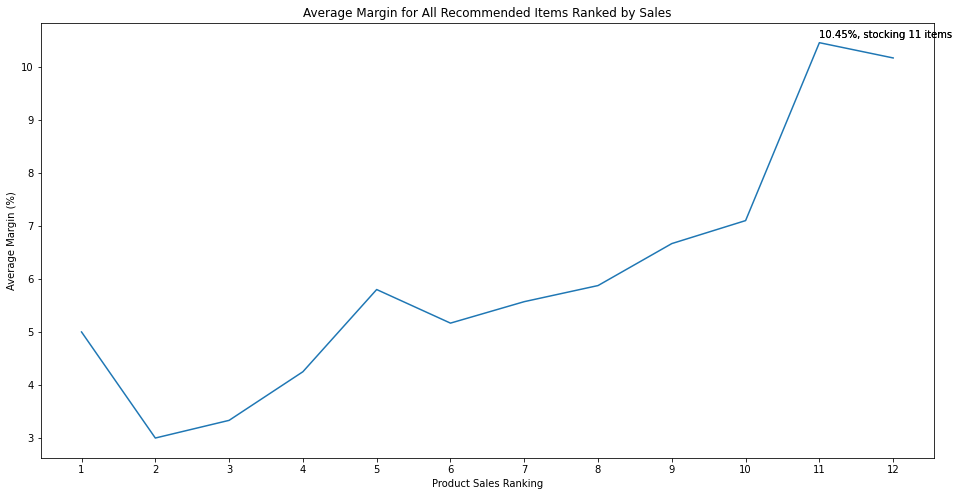

In [57]:
findNofCategories(objects, y_pos, performance, xlabel, ylabel, title, path)

Adding the three additional items from the full set of recommendations increased the average margin significantly, from 7 to 10 percent so we will only include the three additional items.

## Exports
Finally, I'll export both datasets as CSV files containing all columns so complete information for each recommended item can be retained. [top](#Table-of-Contents)

In [58]:
p20lst = list(profit_20['ASIN'].values)
fullst = list(full_recs['ASIN'].values)

In [59]:
p20out = source[source['ASIN'].isin(p20lst)]
fullout = source[source['ASIN'].isin(fullst)]

In [60]:
p20out.to_csv('../data/conservative_recs.csv')
p20out.to_csv('../data/full_recs.csv')

## Appendix

As a hypothetical, I wanted to know where profit margins would max out if we didn't restrict the data set in any way: [top](#Table-of-Contents)

In [61]:
source.sort_values(by=['Sales Rank'], inplace=True)

In [62]:
objects = list(source.values)
y_pos = np.arange(len(objects))
performance = list(source['Est. Profit Margin'].expanding(1).mean())
xlabel = 'Product Sales Ranking'
ylabel = 'Average Margin (%)'
title = 'Average Margin for Profitable Bestselling Ranked by Sales'
path = '../images/averageMarginAllItemsPlot.png'

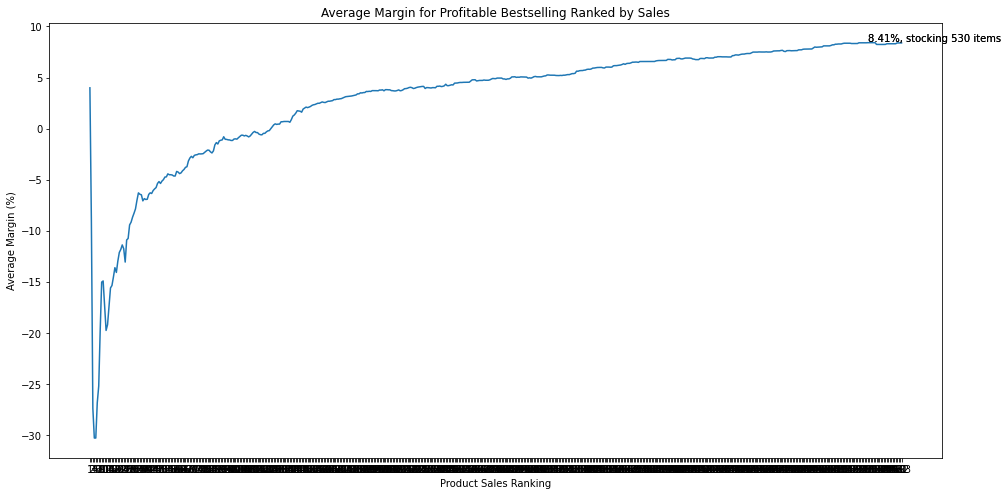

In [63]:
findNofCategories(objects, y_pos, performance, xlabel, ylabel, title, path)